# Harmonic Coefficient Calculator - Design Your Own
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/harmonic_coefficient_calculator.ipynb)

An illustration how to use our regression equations to calculate the harmonic coefficients (Fourier coefficients).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

### Get your data together

In [2]:
# Define the window size (10.1) and sampling rate (0.1)
T = 10.1
time_step = .1
t = np.arange(0.,T,time_step)
N = np.size(t)-1

Now we are going to make-up our data. To do this, we are going to combine sines and cosines of varying amplitudes and wavelengths to make a final "time series" called y. 

In [3]:
#================================
# Change the values in A_actual and B_actual
# to change your synthetic time series
#================================
A_actual = [10.,
            8.,
            0.,
            10.,
            0.,
            2.,
            0.,
            4.,
            0.,
           ]
B_actual = [0., #do not change this value
            0.,
            7.,
            0.,
            0.,
            0.,
            0.,
            0.,
            0.,
           ]
data = np.swapaxes(np.around((A_actual,B_actual),decimals=3),0,1)
df_actual = pd.DataFrame(data=data, columns=['A actual','B actual'])
df_actual

,A actual,B actual
0,10.0,0.0
1,8.0,0.0
2,0.0,7.0
3,10.0,0.0
4,0.0,0.0
5,2.0,0.0
6,0.0,0.0
7,4.0,0.0
8,0.0,0.0


In [4]:
# make your synthetic data curve "y"
y = 0.
# add cosine terms
for ia, a_coeff in enumerate(A_actual):
    y = y + a_coeff*np.cos(2.*np.pi*ia*t/T)
# add since terms
for ib, b_coeff in enumerate(B_actual):
    y = y + b_coeff*np.sin(2.*np.pi*ib*t/T)

Now let's plot the resulting time series. _Remember_: we know y exactly, and we know how much of wavenumber k=1 cosine is in there (i.e. A1 = 8), how much of wavenumber k=2 sine is in there (i.e. B2 = 7), etc.

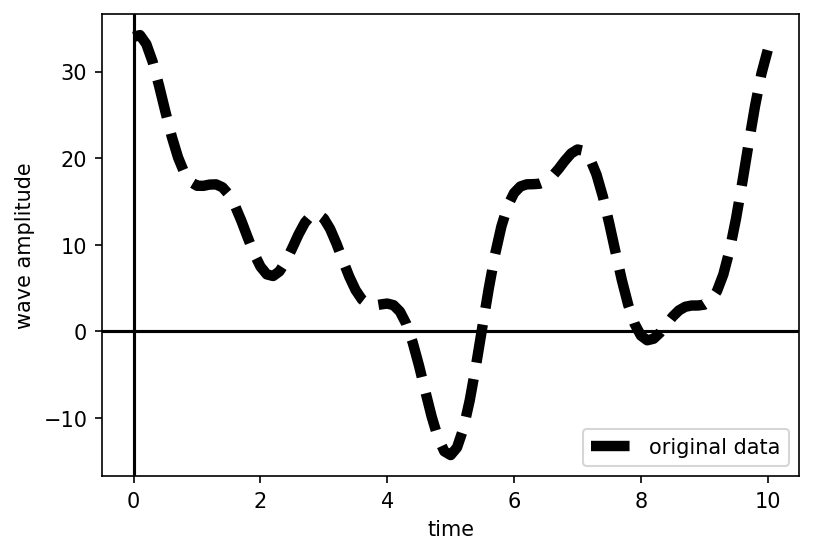

In [5]:
plt.figure()
plt.plot(t,y,'--k',linewidth = 5, label = 'original data')

plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')

plt.xlabel('time')
plt.legend()
plt.ylabel('wave amplitude')
plt.show()

### Calculate the harmonic coefficients

Like with so many examples in this class, we are now going to pretend that we don't know how y was made. We are then going to use our regression techniques discussed in class to try and calculate the amounts of each cosine/sine function that was used to make y. Since we know the true answer, we can check and see how our harmonic coefficient calculator did.

Step 1 is to initialize our cosine amplitude (A_guess) and sine ampitude (B_guess) arrays. For now, the maximum number of coefficients we will calculate are up to wavenumber 7 - but this can of course be changed very easily.

In [6]:
A_guess = np.zeros((len(A_actual),))
B_guess = np.zeros((len(B_actual,)))

This is the set of lines where the "magic" happens. We use our regression coefficient relationships to estimate the A's and B's. It is really just a loop with two lines of code - one for the cosine coefficients (A_guess) and the other for the sine coefficients (B_guess). Easy!

In [7]:
A_guess[0,]=np.mean(y)
B_guess[0,]=0.

for k in np.arange(len(A_actual)-1):
    A_guess[k+1,] = np.round(2.*np.mean(np.cos(2.*np.pi*(k+1)*t/T) * y),5)
    B_guess[k+1,] = np.round(2.*np.mean(np.sin(2.*np.pi*(k+1)*t/T) * y),5)
data = np.swapaxes(np.around((A_guess,B_guess),decimals=3),0,1)
df_guess = pd.DataFrame(data=data, columns=["A estimate","B estimate"])
df = pd.concat([df_actual, df_guess], axis=1)
df

,A actual,B actual,A estimate,B estimate
0,10.0,0.0,10.0,0.0
1,8.0,0.0,8.0,-0.0
2,0.0,7.0,0.0,7.0
3,10.0,0.0,10.0,-0.0
4,0.0,0.0,0.0,-0.0
5,2.0,0.0,2.0,0.0
6,0.0,0.0,0.0,-0.0
7,4.0,0.0,4.0,-0.0
8,0.0,0.0,0.0,-0.0


Now - let's compare our estimated coefficients with the actual coefficients. First for the cosine terms, then the sine terms.

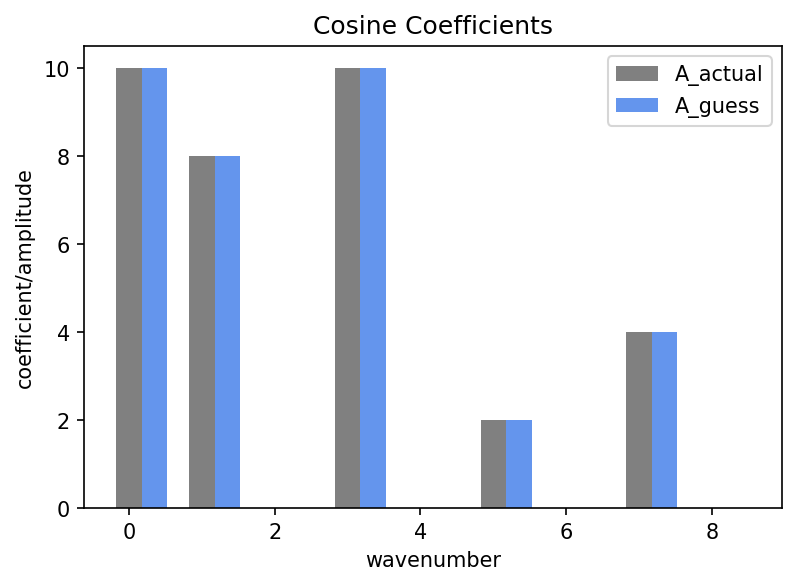

In [8]:
bar_width = .35
plt.figure()

plt.bar(np.arange(len(A_actual)), A_actual, bar_width, color = 'gray', label = 'A_actual')
plt.bar(np.arange(len(B_actual))+bar_width, A_guess, bar_width, color = 'cornflowerblue', label = 'A_guess')

plt.title('Cosine Coefficients')
plt.xlabel('wavenumber')
plt.ylabel('coefficient/amplitude')

plt.legend()

plt.show()

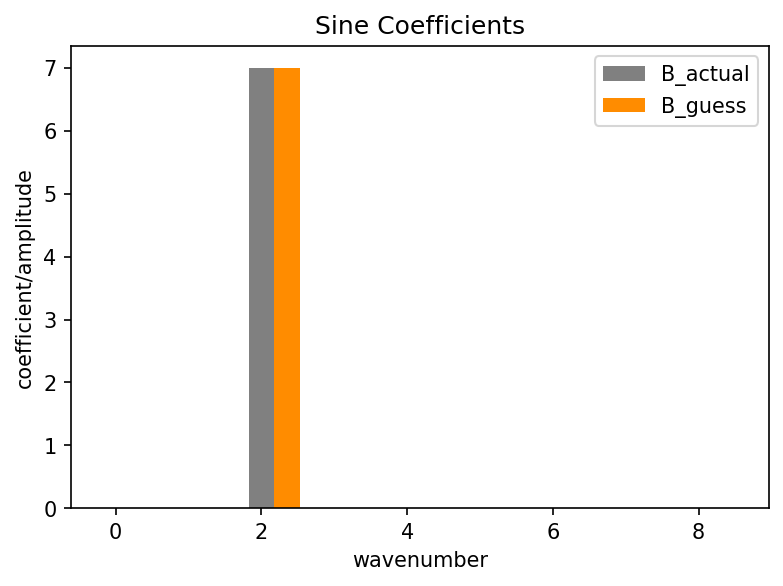

In [9]:
plt.figure()

plt.bar(np.arange(len(B_actual)), B_actual, bar_width, color = 'gray', label = 'B_actual')
plt.bar(np.arange(len(B_actual))+bar_width, B_guess, bar_width, color = 'darkorange', label = 'B_guess')

plt.title('Sine Coefficients')
plt.xlabel('wavenumber')
plt.ylabel('coefficient/amplitude')

plt.legend()

plt.show()

Wow! You can see we did a perfect job - reconstructing our data from bits of sines and cosines. This is a Fourier decomposition!!

### Putting the pieces back together

To totally convince you that our coefficient calculator did a good job, let's plot the different contributors to our curve using our estimated coefficients for each term.

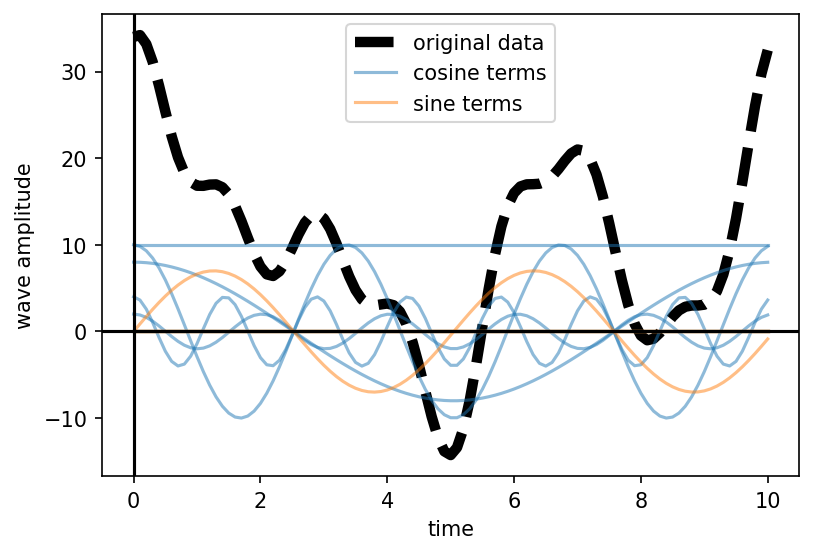

In [10]:
plt.figure()
plt.plot(t,y,'--k',linewidth = 5, label = 'original data')
plt.xlabel('time')
plt.ylabel('wave amplitude')

#plot the cosine curves
for ia, a_coeff in enumerate(A_guess):
    if ia == 0:
        label = 'cosine terms'
    else:
        label = None
    plt.plot(t,a_coeff*np.cos(2.*np.pi*ia*t/T),'-', color = 'tab:blue',label=label, alpha=.5)
#plot the sine curves
for ib, b_coeff in enumerate(B_guess):
    if ib == 0:
        label = 'sine terms'
    else:
        label = None
    plt.plot(t,b_coeff*np.sin(2.*np.pi*ib*t/T),'-', color = 'tab:orange',label=label, alpha=.5)

plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')
plt.legend()
plt.show()

Finally, we can add-up all of these contributions (gray curves above) and see what our reconstructed time series looks like (this is the red line plotted below).

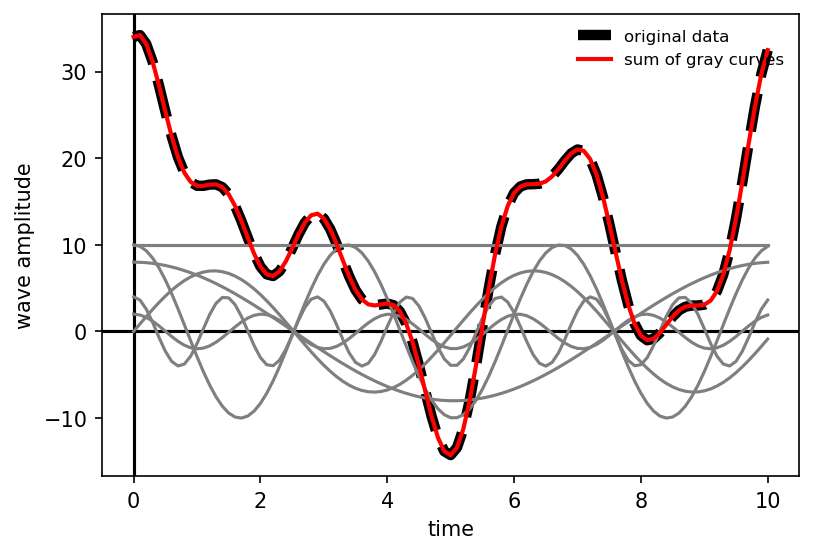

In [11]:
plt.figure()
plt.plot(t,y,'--k',linewidth = 5, label = 'original data')
plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')
plt.xlabel('time')
plt.ylabel('wave amplitude')

y_sum_terms = 0.
#plot the cosine curves
for ia, a_coeff in enumerate(A_guess):
    if(a_coeff==0.):
        continue
    cos_component = a_coeff*np.cos(2.*np.pi*ia*t/T)
    y_sum_terms = y_sum_terms + cos_component
    plt.plot(t,cos_component,'-', color = 'tab:gray',label=None)
#plot the sine curves
for ib, b_coeff in enumerate(B_guess):
    if(b_coeff==0):
        continue
    sin_component = b_coeff*np.sin(2.*np.pi*ib*t/T)
    y_sum_terms = y_sum_terms + sin_component
    plt.plot(t,sin_component,'-', color = 'tab:gray',label=None)

plt.plot(t,y_sum_terms,'-',color = 'red', linewidth = 2, label = 'sum of gray curves')    
plt.legend(frameon = False, loc = 'upper right', fontsize = 8)
plt.show()


Now you should be impressed. It worked! We got back our original data (black curve) exactly using the sum of the gray curves, where the "amount" of each gray curve was determined by our harmonic coefficient calculator, or a.k.a., our Fourier decomposition via regression!

In [12]:
raise Exception("You. Shall. Not. Pass.")

Exception: You. Shall. Not. Pass.

## Let's make things messy now

Now, we are going to make a random (guassian white noise) time series and see if this approach still works. Let's make our messy time series!

In [ ]:
N = 500
T = N + 1
t = np.arange(0,N)
y = np.random.normal(0,1,(N,))

plt.figure(figsize=(20,4))
plt.plot(t,y,'-k',linewidth = 2, label = 'original data')

plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')

plt.xlabel('time')
plt.legend()
plt.ylabel('wave amplitude')
plt.show()

Let's look at the ingredients (i.e. A_k and B_k).

In [ ]:
A_guess = np.zeros(int(N/2,))
B_guess = np.zeros(int(N/2,))

for k in np.arange(len(A_guess)-1):
    A_guess[k+1,] = np.round(2.*np.mean(np.cos(2.*np.pi*(k+1)*t/T) * y),5)
    B_guess[k+1,] = np.round(2.*np.mean(np.sin(2.*np.pi*(k+1)*t/T) * y),5)
data = np.swapaxes(np.around((A_guess,B_guess),decimals=3),0,1)
df_guess = pd.DataFrame(data=data, columns=["A estimate","B estimate"])
df_guess

In [ ]:
bar_width = .35
plt.figure()

plt.bar(np.arange(len(A_guess))+bar_width, A_guess, bar_width, color = 'cornflowerblue', label = 'A_guess')
plt.bar(np.arange(len(B_guess))-bar_width, B_guess, bar_width, color = 'darkorange', label = 'B_guess')

plt.title('Cosine Coefficients')
plt.xlabel('wavenumber')
plt.ylabel('coefficient/amplitude')

plt.legend()

plt.show()


Let's plot the ingredients.

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(t,y,'-k',linewidth = 2, label = 'original data')
plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')
plt.xlabel('time')
plt.ylabel('wave amplitude')

#plot the cosine curves
for ia, a_coeff in enumerate(A_guess):
    if ia == 0:
        label = 'cosine terms'
    else:
        label = None
    plt.plot(t,a_coeff*np.cos(2.*np.pi*ia*t/T),'-', color = 'tab:blue',label=label, alpha=.3, linewidth=.25)
#plot the sine curves
for ib, b_coeff in enumerate(B_guess):
    if ib == 0:
        label = 'sine terms'
    else:
        label = None
    plt.plot(t,b_coeff*np.sin(2.*np.pi*ib*t/T),'-', color = 'tab:orange',label=label, alpha=.3, linewidth=.25)

plt.legend()
plt.show()


Finally, we can add-up all of these contributions (gray curves above) and see what our reconstructed time series looks like (this is the red line plotted below).

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(t,y,'-k',linewidth = 2, label = 'original data',zorder=100)
plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')
plt.xlabel('time')
plt.ylabel('wave amplitude')

y_sum_terms = 0.
#plot the cosine curves
for ia, a_coeff in enumerate(A_guess):
    if(a_coeff==0.):
        continue
    cos_component = a_coeff*np.cos(2.*np.pi*ia*t/T)
    y_sum_terms = y_sum_terms + cos_component
    plt.plot(t,cos_component,'-', color = 'tab:gray',label=None, alpha=.2)
#plot the sine curves
for ib, b_coeff in enumerate(B_guess):
    if(b_coeff==0):
        continue
    sin_component = b_coeff*np.sin(2.*np.pi*ib*t/T)
    y_sum_terms = y_sum_terms + sin_component
    plt.plot(t,sin_component,'-', color = 'tab:gray',label=None, alpha=.2)

plt.plot(t,y_sum_terms,'--',color = 'red', linewidth = 2, label = 'sum of gray curves', zorder=100)
plt.legend(frameon = False, loc = 'upper right', fontsize = 8)
plt.show()